<a href="https://colab.research.google.com/github/Cgaz275/PTDL/blob/main/PTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install pandas seaborn Bokeh matplotlib

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show
from bokeh.layouts import column
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CheckboxGroup, CustomJS
from bokeh.io import output_notebook

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Contents/HR_comma_sep.csv")

# Làm sạch dữ liệu
*  Kiểm tra các giá trị null
*  Kiểm tra dữ liệu trùng lắp






In [23]:
#Kiểm tra tổng các giá trị null trong mỗi thuộc tính
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
sales,0
salary,0


In [24]:
#Loại bỏ dữ liệu có giá trị null
df.dropna(inplace=True)

In [25]:
#Kiểm tra trùng lắp
df.duplicated().sum()

np.int64(3008)

In [26]:
#Loại bỏ các giá trị trùng
df.drop_duplicates(inplace=True)

# Nội dung 1 - Châu Gia Anh


In [27]:
#Kiểm tra tổng số cột và hàng của dữ liệu : (hàng, cột)
df.shape

(11991, 10)

In [28]:
# Các thông tin về kiểu dữ liệu, tên trường
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   sales                  11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [29]:
# Miêu tả các thông số cơ bản của dữ liệu
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


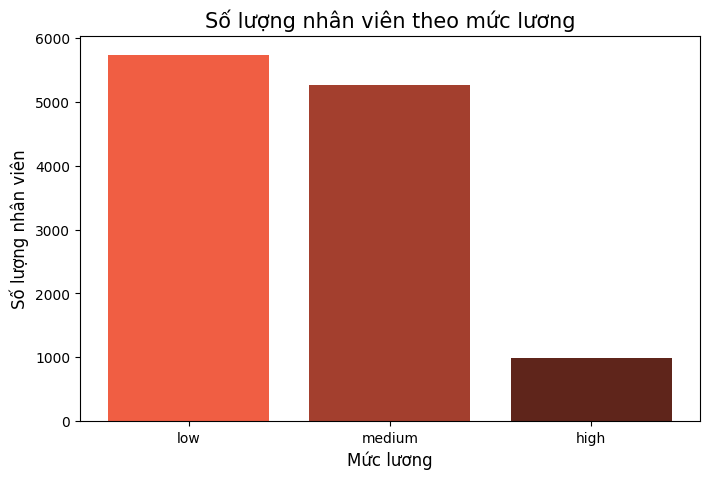

In [30]:
# Đếm số lượng nhân viên theo từng mức lương
salary_counts = df['salary'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(8, 5))
plt.bar(salary_counts.index, salary_counts.values, color=['#F05E43', '#A33F2E', '#5F251B'])

# Thêm tiêu đề và nhãn
plt.xlabel("Mức lương", size = 12)
plt.ylabel("Số lượng nhân viên", size = 12)
plt.title("Số lượng nhân viên theo mức lương", size = 15)

# Hiển thị biểu đồ
plt.show()

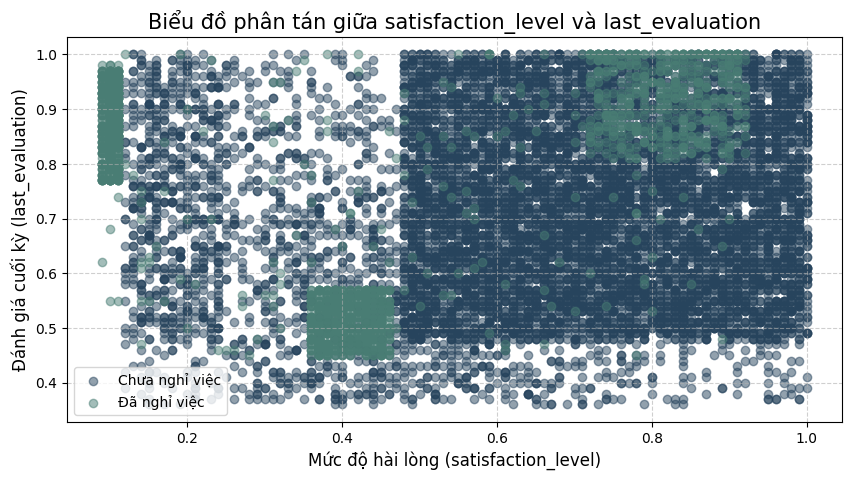

In [33]:
# Tạo hai nhóm: Nhân viên đã nghỉ và chưa nghỉ
df_left = df[df['left'] == 1]  # Nhân viên đã nghỉ việc
df_stay = df[df['left'] == 0]  # Nhân viên vẫn làm việc

# Vẽ biểu đồ scatter
plt.figure(figsize=(10, 5))
plt.scatter(df_stay['satisfaction_level'], df_stay['last_evaluation'],
            color='#27445D', alpha=0.5, label="Chưa nghỉ việc")
plt.scatter(df_left['satisfaction_level'], df_left['last_evaluation'],
            color='#497D74', alpha=0.5, label="Đã nghỉ việc")

# Thêm tiêu đề và nhãn
plt.xlabel("Mức độ hài lòng (satisfaction_level)", size = 12)
plt.ylabel("Đánh giá cuối kỳ (last_evaluation)", size = 12)
plt.title("Biểu đồ phân tán giữa satisfaction_level và last_evaluation", size = 15)
plt.legend()  # Hiển thị chú thích
plt.grid(True, linestyle="--", alpha=0.6)  # Thêm lưới giúp dễ nhìn

# Hiển thị biểu đồ
plt.show()

# Nội dung 2 - Đào Thị Thanh Tâm

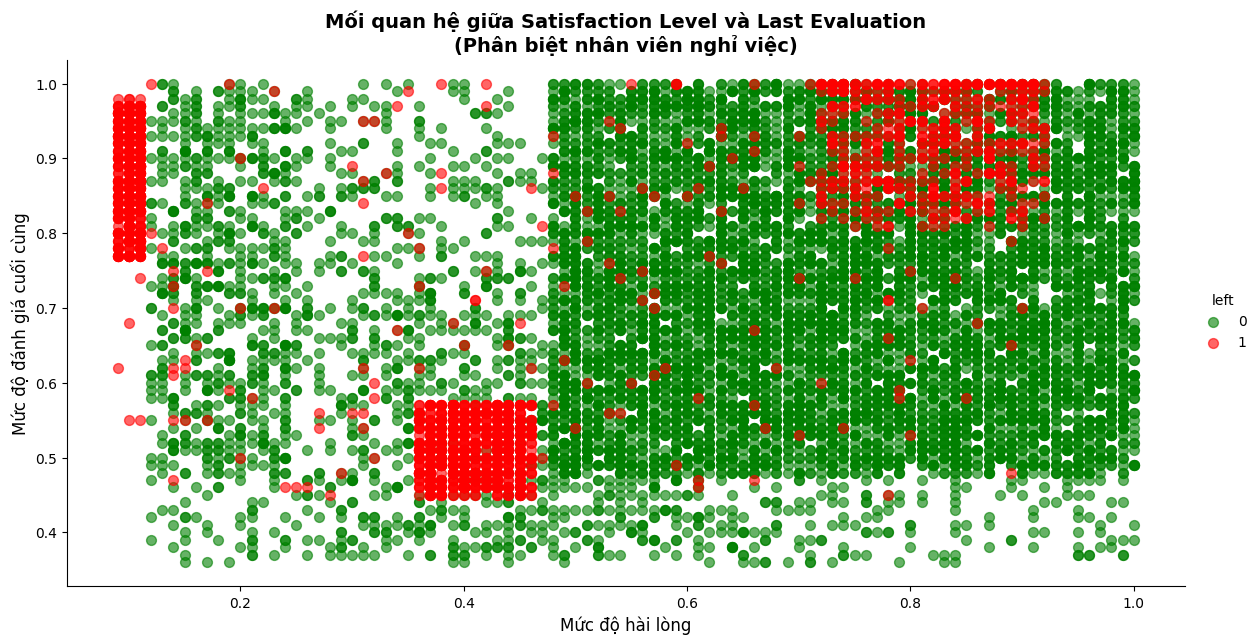

In [ ]:
plot = sns.lmplot(
    x="satisfaction_level",
    y="last_evaluation",
    data=df,
    fit_reg=False,  # Không vẽ đường hồi quy
    hue="left",  # Phân biệt màu theo trạng thái nghỉ việc
    palette={0: "green", 1: "red"},  # Màu sắc: Xanh cho nhân viên còn làm, Đỏ cho nghỉ việc
    height=6,  # Chiều cao biểu đồ
    aspect=2,  # Tỷ lệ khung hình (rộng hơn)
    scatter_kws={'s': 50, 'alpha': 0.6}  # Kích thước điểm (s), độ trong suốt (alpha)
)

# Tùy chỉnh nhãn và tiêu đề
plt.xlabel("Mức độ hài lòng", fontsize=12)
plt.ylabel("Mức độ đánh giá cuối cùng", fontsize=12)
plt.title("Mối quan hệ giữa Satisfaction Level và Last Evaluation\n(Phân biệt nhân viên nghỉ việc)", fontsize=14, fontweight="bold")

# Hiển thị biểu đồ
plt.show()

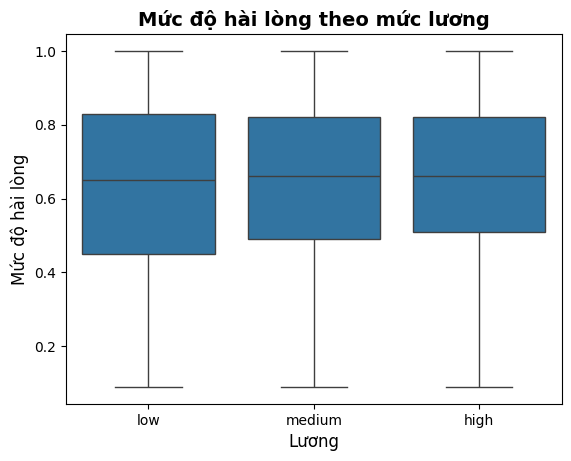

In [ ]:
# box plot
sns.boxplot(x='salary', y='satisfaction_level', data=df)
plt.title("Mức độ hài lòng theo mức lương", fontsize=14, fontweight='bold')
plt.xlabel("Lương", fontsize=12)
plt.ylabel("Mức độ hài lòng", fontsize=12)

plt.show()


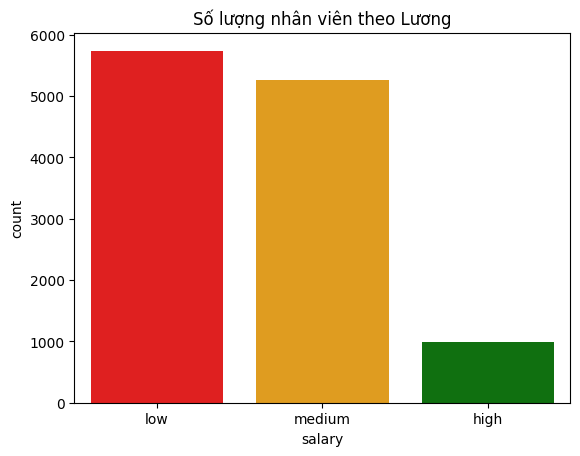

In [ ]:
# count plot
sns.countplot(x='salary', data=df, hue='salary',  palette={"low": "red", "medium": "orange", "high": "green"})
plt.title("Số lượng nhân viên theo Lương")
plt.show()

# Nội dung 3 - Dương Lê Khánh


In [ ]:
output_notebook()

### 📊 1. Biểu đồ cột: Số lượng nhân viên theo Salary ###
salary_counts = df["salary"].value_counts()

bar_source = ColumnDataSource(data={
    'salary': salary_counts.index.tolist(),
    'count': salary_counts.values.tolist()
})

bar_chart = figure(x_range=salary_counts.index.tolist(),
                   title="Số lượng nhân viên theo mức lương",
                   x_axis_label="Mức lương",
                   y_axis_label="Số lượng nhân viên",
                   width=800, height=400)

bar_chart.vbar(x='salary', top='count', width=0.6, source=bar_source, color="#FF9800")

### 🎯 2. Biểu đồ phân tán: Satisfaction Level vs Last Evaluation ###
color_map = {1: "#F50057", 0: "#00BFA5"}  # 0: Tím, 1: Xanh ngọc
colors = [color_map[left] for left in df["left"]]

scatter_source = ColumnDataSource(data={
    'x': df['satisfaction_level'],
    'y': df['last_evaluation'],
    'salary': df['salary'],
    'left': df['left'].astype(str),
    'color': colors
})

scatter_plot = figure(title="Scatter Plot: Satisfaction Level vs Last Evaluation",
                      x_axis_label="Satisfaction Level",
                      y_axis_label="Last Evaluation",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

scatter_plot.scatter('x', 'y', source=scatter_source, size=8, color='color', alpha=0.6)

hover = HoverTool()
hover.tooltips = [("Salary", "@salary"), ("Left", "@left")]
scatter_plot.add_tools(hover)

### 🏗️ Xếp dọc 2 biểu đồ ###
layout = column(bar_chart, scatter_plot)
show(layout)


In [ ]:


output_notebook()  # Hiển thị trong Jupyter Notebook

### 🎯 Biểu đồ phân tán: Satisfaction Level vs Last Evaluation ###
color_map = {0: "#7B1FA2", 1: "#00BFA5"}  # 0: Tím, 1: Xanh ngọc

# Dữ liệu chia theo nhóm
df_0 = df[df["left"] == 0]
df_1 = df[df["left"] == 1]

source_0 = ColumnDataSource(data={'x': df_0['satisfaction_level'], 'y': df_0['last_evaluation'], 'salary': df_0['salary']})
source_1 = ColumnDataSource(data={'x': df_1['satisfaction_level'], 'y': df_1['last_evaluation'], 'salary': df_1['salary']})

scatter_plot = figure(title="Scatter Plot: Satisfaction Level vs Last Evaluation",
                      x_axis_label="Satisfaction Level",
                      y_axis_label="Last Evaluation",
                      width=800, height=500,
                      tools="pan,wheel_zoom,reset")

# Thêm 2 nhóm dữ liệu với màu sắc khác nhau
scatter_0 = scatter_plot.scatter('x', 'y', source=source_0, size=8, color=color_map[0], alpha=0.6, legend_label="Chưa nghỉ việc")
scatter_1 = scatter_plot.scatter('x', 'y', source=source_1, size=8, color=color_map[1], alpha=0.6, legend_label="Đã nghỉ việc")

hover = HoverTool()
hover.tooltips = [("Salary", "@salary")]
scatter_plot.add_tools(hover)

### 🔘 Thêm Checkbox để ẩn/hiện nhóm ###
checkbox = CheckboxGroup(labels=["Chưa nghỉ việc", "Đã nghỉ việc"], active=[0, 1])  # Mặc định cả 2 đều hiển thị

# CustomJS để điều khiển visibility
callback = CustomJS(args={'scatter_0': scatter_0, 'scatter_1': scatter_1, 'checkbox': checkbox}, code="""
    scatter_0.visible = checkbox.active.includes(0);
    scatter_1.visible = checkbox.active.includes(1);
""")
checkbox.js_on_change("active", callback)

### 🏗️ Xếp dọc Checkbox và Scatter Plot ###
layout = column(checkbox, scatter_plot)
show(layout)
